In [2]:
"""
Created on Sun Apr 17 16:32:23 2022

@author: Raziel
"""


import numpy as np
import matplotlib.pylab as plt
from matplotlib import cm

TTime = 0.05
N = 101
N_t = 10
Del_t = TTime / N_t
alpha = 0.05
L = 2.0
h=L/(N-1)


xx=[]
yy=[]
xx=np.linspace(0,L,N)
yy=np.linspace(0,L,N)
X,Y=np.meshgrid(xx,yy)


s=(N,N)
u=np.ones(s)


In [3]:

for xx in range(int(0.5/h),int(1/h + 1)):
    for yy in range(int(0.5/h),int(1/h + 1)):
        u[xx,yy]=2
        
b=np.zeros(N*N)
A=np.zeros((N*N,N*N))

x=u.reshape(N*N)      

for n in range(1,N_t):
    print (n)
    for i in range(1,N-1):
        for j in range(1,N-1):
            m = i*N+j
            # print(m)
            m_xn=(i-1)*N+j
            m_xp=(i+1)*N+j
            m_yn=i*N+j-1
            m_yp=i*N+j+1
            
            A[m,m] = 1+(2*alpha*Del_t/h/h)
            A[m,m_xn] = -alpha*Del_t/h/h/2
            A[m,m_xp] = -alpha*Del_t/h/h/2
            A[m,m_yn] = -alpha*Del_t/h/h/2
            A[m,m_yp] = -alpha*Del_t/h/h/2
            
            b[m] = x[m] + (alpha * Del_t/h/h/2)*(x[m_xp]-2*x[m]+x[m_xn]) + (alpha * Del_t/h/h/2)*(x[m_yp]- 2*x[m]+x[m_yn])
                        
    for p in range(0,N):
        A[p,p] = 1                     #u[:,0] = 1 bottom boundary
        A[N*N-1-p, N*N-1-p] = 1        #u[:,N-1] = 1
        A[N*p, N*p] = 1                #u[0,:] = 1
        A[(p+1)*N-1, (p+1)*N-1] = 1    #u[N-1,:] = 1
        
        b[p]=1                 #u[:,0]
        b[N*N-1-p]=1           #u[:, N-1]
        b[N*p] = 1             #u[0,:]
        b[(p+1)*N-1] = 1       #u[N-1,:]
        
    x=np.linalg.solve(A,b)
    
u=x.reshape(N,N)   #convert to 2d



1
2
3
4
5
6
7
8
9


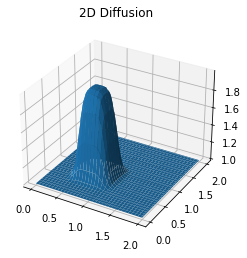

In [4]:

fig=plt.figure()
ax= plt.axes(projection = '3d')
p = ax.plot_surface(X,Y,u) 
plt.title('2D Diffusion')
plt.show()

# fig = plt.figure()
# ax = fig.add_subplot(1,2,1,projection='3d')
# # surf = ax.plot_surface(X, Y, u[-1],cmap=cm.coolwarm)
# surf = ax.plot_surface(X, Y, u,cmap="jet")
# ax.set_xlabel('x-coordinate')
# ax.set_ylabel('y-coordinate')
# ax.set_zlabel('U velocity')
# ax.set_xlim(0,2)
# ax.set_ylim(0,2)
# # ax.set_zlim(0,2)